[0.   0.25 0.5  0.75]
2002 TX300 SMA Freq Filter


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


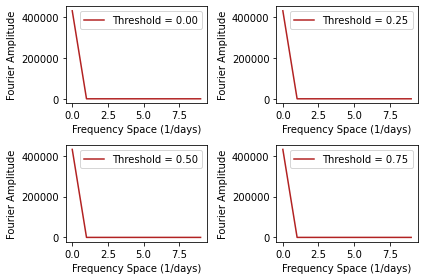

2002 TX300 SMA Filter


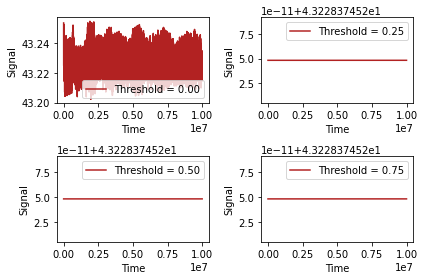

2002 TX300 E*sin(pomega) Freq Filter


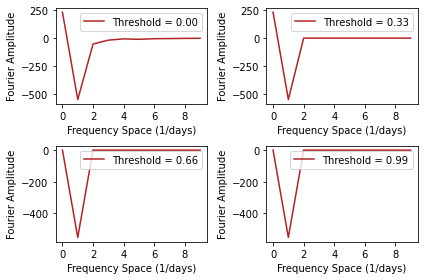

2002 TX300 E*sin(pomega) Filter


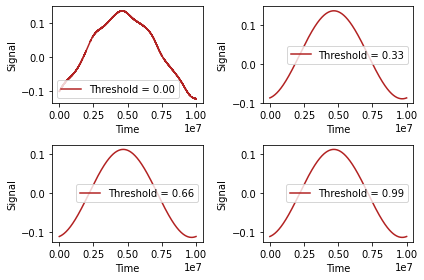

2002 TX300 E*cos(pomega) Freq Filter


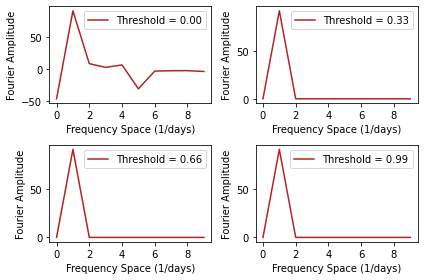

2002 TX300 E*cos(pomega) Filter


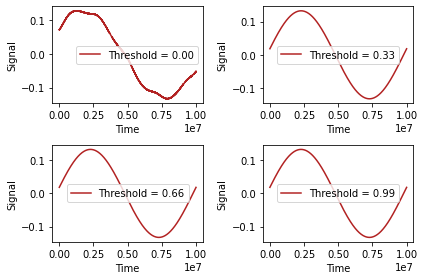

2002 TX300 sin(inc)*sin(Omega) Freq Filter


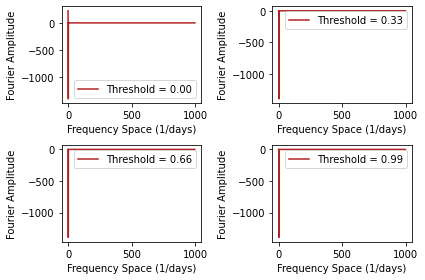

2002 TX300 sin(inc)*sin(Omega) Filter


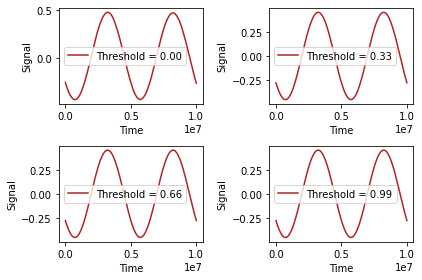

2002 TX300 sin(inc)*cos(Omega) Freq Filter


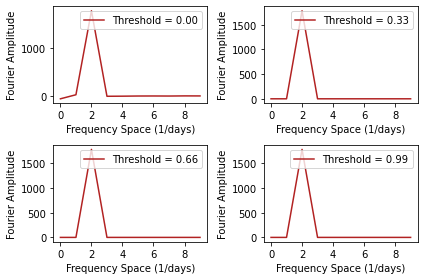

2002 TX300 sin(inc)*cos(Omega) Filter


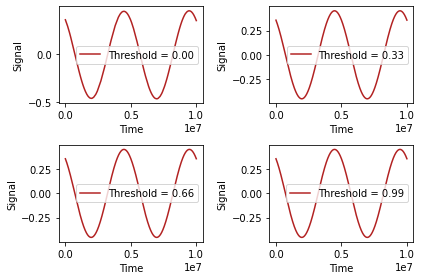

2002 TX300 e Filter


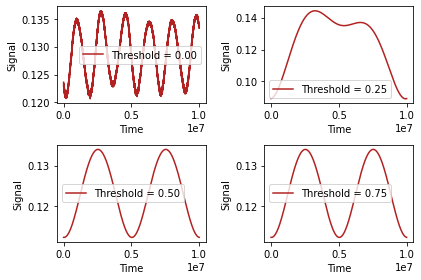

2002 TX300 inc Filter


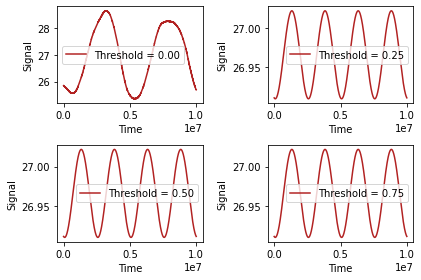

2002 TX300  calculated proper elements
           a         e        inc    sin(i)
0  43.228375  0.123387  26.965976  0.453461


In [93]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import FormatStrFormatter


new_Xph = 1
import pandas as pd
finals = pd.DataFrame(columns=['a','e','inc','sin(i)'])

th_list = np.linspace(0,1,5)
th_list = th_list[0:len(th_list)-1]
print(th_list)

objname = '2002 TX300'
series = pd.read_csv('TNOs/'+objname+'/series.csv')
t = series['t'].values
a = series['a'].values
e = series['e'].values
inc = series['inc'].values
phi = series['phi'].values
omega = series['omega'].values
Omega = series['Omega'].values
M = series['M'].values

def filter_signal(th):
    f_s = fft_filter(th)
    return np.real(np.fft.ifft(f_s))
def fft_filter(perc, sig):
    fft_signal = np.fft.fft(sig)
    fft_abs = np.abs(fft_signal)
    th=perc*(2*fft_abs[0:int(len(sig)/2.)]/new_Xph).max()
    fft_tof=fft_signal.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/new_Xph
    #print('th=', th, ' fft_tof_abs=', fft_tof_abs)
    fft_tof[fft_tof_abs<=th]=0
    #print(np.abs(fft_tof))
    return fft_tof
def fft_filter_amp(th, sig):
    fft = np.fft.fft(sig)
    fft_tof=fft.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=fft_tof_abs/new_Xph
    #print('th=', th/.76, ' fft_tof_abs=', fft_tof_abs)
    fft_tof_abs[fft_tof_abs<=th]=0
    #print(fft_tof_abs)
    return fft_tof_abs

#efreq = np.fft.fft(e)
#plt.plot(efreq[0:int(len(e)/200.)],color='darkorange')
#plt.xlabel('Frequency Space Ecc (1/days)')
#plt.ylabel('Fourier Amplitude')
#plt.show()
print(objname+' SMA Freq Filter')
th_i=0.1
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)
    th_filter = fft_filter(th_i, a)
    plt.plot(th_filter[0:int(len(a)/1000.)],color='firebrick',label='Threshold = %.2f'%(th_list[i]))
    
    plt.xlabel('Frequency Space (1/days)')
    plt.ylabel('Fourier Amplitude')
    plt.legend()
plt.tight_layout()
plt.show()

print(objname+' SMA Filter')
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)
    th_filter = fft_filter(th_i, a)
    signal_filter =np.real(np.fft.ifft(th_filter))
    plt.plot(t,signal_filter,color='firebrick',label='Threshold = %.2f'%(th_list[i]))
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.legend()
plt.tight_layout()
plt.show()

th_filter = fft_filter(th_i, a)
signal_filter =np.real(np.fft.ifft(th_filter))
finals['a'] = [np.mean(signal_filter)]
#print(np.mean(signal_filter))

print(objname+' E*sin(pomega) Freq Filter')
th_i=0.1
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)/0.755
    th_filter = fft_filter(th_i, e*np.sin(omega/180*np.pi+Omega/180*np.pi))
    plt.plot(th_filter[0:int(len(e*np.sin(omega/180*np.pi+Omega/180*np.pi))/1000.)],color='firebrick',label='Threshold = %.2f'%(th_i))
    plt.xlabel('Frequency Space (1/days)')
    plt.ylabel('Fourier Amplitude')
    plt.legend()
plt.tight_layout()
plt.show()

print(objname+' E*sin(pomega) Filter')
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)/0.755
    th_filter = fft_filter(th_i, e*np.sin(omega/180*np.pi+Omega/180*np.pi))
    signal_filter =np.real(np.fft.ifft(th_filter))
    plt.plot(t,signal_filter,color='firebrick',label='Threshold = %.2f'%(th_i))
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.legend()
plt.tight_layout()
plt.show()

th_filter = fft_filter(th_i, e*np.sin(omega/180*np.pi+Omega/180*np.pi))
signal_filter =np.real(np.fft.ifft(th_filter))
finals['e'] = [np.mean(signal_filter)]

print(objname+' E*cos(pomega) Freq Filter')
th_i=0.1
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)/0.755
    th_filter = fft_filter(th_i, e*np.cos(omega/180*np.pi+Omega/180*np.pi))
    plt.plot(th_filter[0:int(len(inc)/1000.)],color='firebrick',label='Threshold = %.2f'%(th_i))
    plt.xlabel('Frequency Space (1/days)')
    plt.ylabel('Fourier Amplitude')
    plt.legend()
plt.tight_layout()
plt.show()

print(objname+' E*cos(pomega) Filter')
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)/0.755
    th_filter = fft_filter(th_i, e*np.cos(omega/180*np.pi+Omega/180*np.pi))
    signal_filter =np.real(np.fft.ifft(th_filter))
    plt.plot(t,signal_filter,color='firebrick',label='Threshold = %.2f'%(th_i))
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.legend()
plt.tight_layout()
plt.show()
  
th_filter = fft_filter(th_i, e*np.cos(omega/180*np.pi+Omega/180*np.pi))
signal_filter =np.real(np.fft.ifft(th_filter))
#finals['e*np.cos(omega+Omega)'] = [np.mean(signal_filter)]

print(objname+' sin(inc)*sin(Omega) Freq Filter')
th_i=0.1
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)/0.755
    th_filter = fft_filter(th_i, np.sin(inc/180*np.pi)*np.sin(Omega/180*np.pi))
    #print('th_filter', th_filter)
    plt.plot(th_filter[0:int(len(th_filter)/10.)],color='firebrick',label='Threshold = %.2f'%(th_i))
    plt.xlabel('Frequency Space (1/days)')
    plt.ylabel('Fourier Amplitude')
    plt.legend()
plt.tight_layout()
plt.show()

print(objname+' sin(inc)*sin(Omega) Filter')
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)/0.755
    th_filter = fft_filter(th_i, np.sin(inc/180*np.pi)*np.sin(Omega/180*np.pi))
    signal_filter =np.real(np.fft.ifft(th_filter))
    plt.plot(t,signal_filter,color='firebrick',label='Threshold = %.2f'%(th_i))
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.legend()
plt.tight_layout()
plt.show()

th_filter = fft_filter(th_i, np.sin(inc/180*np.pi)*np.sin(Omega/180*np.pi))
signal_filter =np.real(np.fft.ifft(th_filter))
#finals['phi'] = [np.mean(signal_filter)]

print(objname+' sin(inc)*cos(Omega) Freq Filter')
th_i=0.1
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)/0.755
    th_filter = fft_filter(th_i, np.sin(inc/180*np.pi)*np.cos(Omega/180*np.pi))
    plt.plot(th_filter[0:int(len(phi)/1000.)],color='firebrick',label='Threshold = %.2f'%(th_i))
    plt.xlabel('Frequency Space (1/days)')
    plt.ylabel('Fourier Amplitude')
    plt.legend()
plt.tight_layout()
plt.show()

print(objname+' sin(inc)*cos(Omega) Filter')
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)/0.755
    th_filter = fft_filter(th_i, np.sin(inc/180*np.pi)*np.cos(Omega/180*np.pi))
    signal_filter =np.real(np.fft.ifft(th_filter))
    plt.plot(t,signal_filter,color='firebrick',label='Threshold = %.2f'%(th_i))
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.legend()
plt.tight_layout()
plt.show()

th_filter = fft_filter(th_i, np.sin(inc/180*np.pi)*np.cos(Omega/180*np.pi))
signal_filter =np.real(np.fft.ifft(th_filter))
#finals['omega'] = [np.mean(signal_filter)]

print(objname+' e Filter')
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)
    th_filter_1 = fft_filter(th_i, e*np.sin(omega/180*np.pi+Omega/180*np.pi))
    th_filter_2 = fft_filter(th_i, e*np.cos(omega/180*np.pi+Omega/180*np.pi))
    th_filter_3 = fft_filter(th_i, np.sin(inc/180*np.pi)*np.sin(Omega/180*np.pi))
    th_filter_4 = fft_filter(th_i, np.sin(inc/180*np.pi)*np.cos(Omega/180*np.pi))
    signal_filter =np.real(np.fft.ifft(th_filter))
    signal_filter_1 =np.real(np.fft.ifft(th_filter_1))
    signal_filter_2 =np.real(np.fft.ifft(th_filter_2))
    signal_filter_3 =np.real(np.fft.ifft(th_filter_3))
    signal_filter_4 =np.real(np.fft.ifft(th_filter_4))
    
    pomega_new = np.arctan2(signal_filter_1,signal_filter_2)
    Omega_new = np.arctan2(signal_filter_3,signal_filter_4)
    omega_new = pomega_new - Omega_new
    inc_new = np.arcsin(signal_filter_3/np.sin(Omega_new))
    e_new = np.arcsin(signal_filter_1/np.sin(pomega_new))
    plt.plot(t,e_new,color='firebrick',label='Threshold = %.2f'%(th_i))
    finals['e'] = [np.mean(e_new)]
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.legend()
plt.tight_layout()
plt.show()


print(objname+' inc Filter')
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)
    th_filter_1 = fft_filter(th_i, e*np.sin(omega/180*np.pi+Omega/180*np.pi))
    th_filter_2 = fft_filter(th_i, e*np.cos(omega/180*np.pi+Omega/180*np.pi))
    th_filter_3 = fft_filter(th_i, np.sin(inc/180*np.pi)*np.sin(Omega/180*np.pi))
    th_filter_4 = fft_filter(th_i, np.sin(inc/180*np.pi)*np.cos(Omega/180*np.pi))
    signal_filter =np.real(np.fft.ifft(th_filter))
    signal_filter_1 =np.real(np.fft.ifft(th_filter_1))
    signal_filter_2 =np.real(np.fft.ifft(th_filter_2))
    signal_filter_3 =np.real(np.fft.ifft(th_filter_3))
    signal_filter_4 =np.real(np.fft.ifft(th_filter_4))
    
    pomega_new = np.arctan2(signal_filter_1,signal_filter_2)
    Omega_new = np.arctan2(signal_filter_3,signal_filter_4)
    omega_new = pomega_new - Omega_new
    inc_new = np.arcsin(signal_filter_3/np.sin(Omega_new))
    e_new = np.arcsin(signal_filter_1/np.sin(pomega_new))
    plt.plot(t,inc_new*180/np.pi,color='firebrick',label='Threshold = %.2f'%(th_i))
    finals['inc'] = [np.mean(inc_new*180/np.pi)]
    finals['sin(i)'] = [np.mean(np.sin(inc_new))]
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.legend()
plt.tight_layout()
plt.show()

'''
print(objname+' omega Filter')
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)/0.755
    th_filter_1 = fft_filter(th_i, e*np.sin(omega/180*np.pi+Omega/180*np.pi))
    th_filter_2 = fft_filter(th_i, e*np.cos(omega/180*np.pi+Omega/180*np.pi))
    th_filter_3 = fft_filter(th_i, np.sin(inc/180*np.pi)*np.sin(Omega/180*np.pi))
    th_filter_4 = fft_filter(th_i, np.sin(inc/180*np.pi)*np.cos(Omega/180*np.pi))
    signal_filter =np.real(np.fft.ifft(th_filter))
    signal_filter_1 =np.real(np.fft.ifft(th_filter_1))
    signal_filter_2 =np.real(np.fft.ifft(th_filter_2))
    signal_filter_3 =np.real(np.fft.ifft(th_filter_3))
    signal_filter_4 =np.real(np.fft.ifft(th_filter_4))
    
    pomega_new = np.arctan2(signal_filter_1,signal_filter_2)
    Omega_new = np.arctan2(signal_filter_3,signal_filter_4)
    omega_new = pomega_new - Omega_new
    inc_new = np.arcsin(signal_filter_3/np.sin(Omega_new))
    e_new = np.arcsin(signal_filter_1/np.sin(pomega_new))
    plt.plot(t,omega,color='firebrick',label='Threshold = %.2f'%(th_i))
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.legend()
plt.tight_layout()
plt.show()

print(objname+' omega_new Filter')
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)/0.755
    th_filter_1 = fft_filter(th_i, e*np.sin(omega/180*np.pi+Omega/180*np.pi))
    th_filter_2 = fft_filter(th_i, e*np.cos(omega/180*np.pi+Omega/180*np.pi))
    th_filter_3 = fft_filter(th_i, np.sin(inc/180*np.pi)*np.sin(Omega/180*np.pi))
    th_filter_4 = fft_filter(th_i, np.sin(inc/180*np.pi)*np.cos(Omega/180*np.pi))
    signal_filter =np.real(np.fft.ifft(th_filter))
    signal_filter_1 =np.real(np.fft.ifft(th_filter_1))
    signal_filter_2 =np.real(np.fft.ifft(th_filter_2))
    signal_filter_3 =np.real(np.fft.ifft(th_filter_3))
    signal_filter_4 =np.real(np.fft.ifft(th_filter_4))
    
    pomega_new = np.arctan2(signal_filter_1,signal_filter_2)
    Omega_new = np.arctan2(signal_filter_3,signal_filter_4)
    omega_new = pomega_new - Omega_new
    inc_new = np.arcsin(signal_filter_3/np.sin(Omega_new))
    e_new = np.arcsin(signal_filter_1/np.sin(pomega_new))
    plt.plot(t,omega_new*180/np.pi,color='firebrick',label='Threshold = %.2f'%(th_i))
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.legend()
plt.tight_layout()
plt.show()

print(objname+' Omega Filter')
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)/0.755
    th_filter_1 = fft_filter(th_i, e*np.sin(omega/180*np.pi+Omega/180*np.pi))
    th_filter_2 = fft_filter(th_i, e*np.cos(omega/180*np.pi+Omega/180*np.pi))
    th_filter_3 = fft_filter(th_i, np.sin(inc/180*np.pi)*np.sin(Omega/180*np.pi))
    th_filter_4 = fft_filter(th_i, np.sin(inc/180*np.pi)*np.cos(Omega/180*np.pi))
    signal_filter =np.real(np.fft.ifft(th_filter))
    signal_filter_1 =np.real(np.fft.ifft(th_filter_1))
    signal_filter_2 =np.real(np.fft.ifft(th_filter_2))
    signal_filter_3 =np.real(np.fft.ifft(th_filter_3))
    signal_filter_4 =np.real(np.fft.ifft(th_filter_4))
    
    pomega_new = np.arctan2(signal_filter_1,signal_filter_2)
    Omega_new = np.arctan2(signal_filter_3,signal_filter_4)
    omega_new = pomega_new - Omega_new
    inc_new = np.arcsin(signal_filter_3/np.sin(Omega/180*np.pi))
    e_new = np.arcsin(signal_filter_1/np.sin(pomega_new))
    plt.plot(t,Omega,color='firebrick',label='Threshold = %.2f'%(th_i))
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.legend()
plt.tight_layout()
plt.show()

print(objname+' Omega_new Filter')
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)/0.755
    th_filter_1 = fft_filter(th_i, e*np.sin(omega/180*np.pi+Omega/180*np.pi))
    th_filter_2 = fft_filter(th_i, e*np.cos(omega/180*np.pi+Omega/180*np.pi))
    th_filter_3 = fft_filter(th_i, np.sin(inc/180*np.pi)*np.sin(Omega/180*np.pi))
    th_filter_4 = fft_filter(th_i, np.sin(inc/180*np.pi)*np.cos(Omega/180*np.pi))
    signal_filter =np.real(np.fft.ifft(th_filter))
    signal_filter_1 =np.real(np.fft.ifft(th_filter_1))
    signal_filter_2 =np.real(np.fft.ifft(th_filter_2))
    signal_filter_3 =np.real(np.fft.ifft(th_filter_3))
    signal_filter_4 =np.real(np.fft.ifft(th_filter_4))
    
    pomega_new = np.arctan2(signal_filter_1,signal_filter_2)
    Omega_new = np.arctan2(signal_filter_3,signal_filter_4)
    omega_new = pomega_new - Omega_new
    inc_new = np.arcsin(signal_filter_3/np.sin(Omega/180*np.pi))
    e_new = np.arcsin(signal_filter_1/np.sin(pomega_new))
    plt.plot(t,Omega_new*180/np.pi,color='firebrick',label='Threshold = %.2f'%(th_i))
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.legend()
plt.tight_layout()
plt.show()
'''
print(objname, " calculated proper elements")
print(finals)

finals.to_csv('TNOs/'+objname+'/prop_elem.csv')

2002 TX300's proper elements in AstDys
SMA = 43.2875328  Ecc = 0.1282216 Sin(I) = 0.4533243

Haumea's proper elements in AstDys
SMA - 43.1280530  Ecc - 0.1857857 Sin(I) - 0.4469326 

 43.228375  0.123387  26.965976  0.453461